In [1]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import cv2
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import numpy as np

from sklearn.cluster import KMeans,MiniBatchKMeans
from sklearn.svm import SVC

%matplotlib inline

In [2]:
digits = np.array([0,1,2,3,4,5,6,7,8,9])
onehot_encoder = OneHotEncoder(sparse=False)
int_encoded = digits.reshape(-1,1)
onehot_encoded = onehot_encoder.fit_transform(int_encoded) #(10,10) matrix, as taught by Andrew about Dummy Variables

In [3]:
onehot_encoded[2]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [4]:
#creating a list of train dataset tuple(image, image tag)
train_dict = []
with open('train_data.txt', 'r') as f:
    for line in f:
        x, y = line.split()
        y = int (y)
        t=(x,y)
        train_dict.append(t)

In [5]:
#creating a list of test dataset tuple(image, image tag)
test_dict = []
with open('test_data.txt', 'r') as f:
    for line in f:
        x, y = line.split()
        y = int (y)
        t=(x,y)
        test_dict.append(t)

In [6]:
# Defining a function to load dataset
def load_images_dataset(data_dict,onehot_encoded,digits):
    dataset = {}
    X=[]
    Y=[]
    for aTuple in data_dict:
        x = cv2.imread(aTuple[0]) 
        if aTuple[1] in digits :
            y = onehot_encoded[aTuple[1]] # get correct onehot encoded value
            X.append(x)
            Y.append(y)# ex : [image_array, digit]
    dataset = {'X': X ,'Y':Y}
    return dataset

In [7]:
train = load_images_dataset(train_dict,onehot_encoded,digits)

In [8]:
train_x=train['X']
train_y=train['Y']

In [9]:
##convert the image to gray scale
filtered_train=[]
#gray_train=[]
scale = 1
delta = 0
ddepth = cv2.CV_16S
for i in range(0 , len(train_x)):
    gray = cv2.cvtColor(train_x[i],cv2.COLOR_BGR2GRAY)
    grad_x = cv2.Sobel(gray,ddepth,1,0,ksize = 3, scale = scale, delta = delta,borderType = cv2.BORDER_DEFAULT)
    grad_y = cv2.Sobel(gray,ddepth,0,1,ksize = 3, scale = scale, delta = delta, borderType = cv2.BORDER_DEFAULT)
    abs_grad_x = cv2.convertScaleAbs(grad_x)   # converting back to uint8
    abs_grad_y = cv2.convertScaleAbs(grad_y)
    dst = cv2.addWeighted(abs_grad_x,0.5,abs_grad_y,0.5,0)
    filtered_train.append(dst)

In [10]:
len(filtered_train)

73257

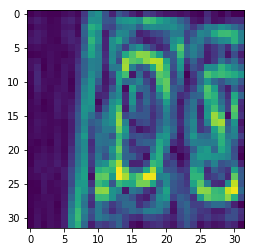

In [12]:
plt.imshow(filtered_train[6])